In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def plot_experiment(experiment_folder, experiment_name, params, fig, axs):
    con = np.load(experiment_folder + 'con' + experiment_name + '.npz')
    state = np.load(experiment_folder + 'state' + experiment_name + '.npz')
    spikes = np.load(experiment_folder + 'spikes' + experiment_name + '.npz')
    
    # Accessing the parameters
    ms = params['ms']
    subspikes = params['subspikes']
    fontsize = params['fontsize']
    tickwidth = params['tickwidth']
    linewidth = params['linewidth']
    dotsize = params['dotsize']
    samplestride = params['samplestride']
    e1_color = params['e1_color']
    e2_color = params['e2_color']
    e12_color = params['e12_color']
    e21_color = params['e21_color']
    i_color = params['i_color']
    start_stim = params['start_stim']
    end_stim = params['end_stim']
    samplestride_stim = params['samplestride_stim']
    record_dt = params['record_dt']

    record_start_stim = int(start_stim/record_dt)
    record_end_stim = int(end_stim/record_dt)

    # prepare arrays
    e_1_i_100 = spikes['i'][spikes['i'] < subspikes]
    e_1_t_100 = spikes['t'][spikes['i'] < subspikes]
    
    e_2_i_100 = spikes['i2'][spikes['i2'] < subspikes]
    e_2_t_100 = spikes['t2'][spikes['i2'] < subspikes]

    i_i_100 = spikes['i3'][spikes['i3'] < subspikes]
    i_t_100 = spikes['t3'][spikes['i3'] < subspikes]
    
    def get_subsamples(arr):
        return np.concatenate([arr[:record_start_stim:samplestride], 
                               arr[record_start_stim:record_end_stim:samplestride_stim], 
                               arr[record_end_stim::samplestride]])

    t = get_subsamples(state['t'])/1000

    phi_E1 = get_subsamples(np.mean(state['phi_E1'], axis=0))
    phi_E2 = get_subsamples(np.mean(state['phi_E2'], axis=0))
    
    d_E1 = get_subsamples(np.mean(state['d_E1'], axis=0))
    d_E2 = get_subsamples(np.mean(state['d_E2'], axis=0))
    
    C_E_1_1 = get_subsamples(con['C_E_1_1'])
    C_E_2_2 = get_subsamples(con['C_E_2_2'])
    C_E_1_2 = get_subsamples(con['C_E_1_2'])
    C_E_2_1 = get_subsamples(con['C_E_2_1'])
    

    # Plotting
    
    axs[0].plot(e_1_t_100/1000, e_1_i_100, 'o', label='E1', color=e1_color, markersize=ms, markeredgewidth=0.0)
    axs[0].plot(e_2_t_100/1000, e_2_i_100 + subspikes, 'o', label='E2', color=e2_color, markersize=ms, markeredgewidth=0.0)
    axs[0].plot(i_t_100/1000, i_i_100 + 2*subspikes, 'o', label='I', color=i_color, markersize=ms, markeredgewidth=0.0)
    axs[0].hlines(y=(3*subspikes)+2, xmin=start_stim, xmax=end_stim, color=e1_color, linewidth=linewidth)
    axs[0].set_yticks([0, subspikes, 2*subspikes, 3*subspikes])
    
    axs[1].axvline(x=start_stim, color='black', linewidth=linewidth)
    axs[1].axvline(x=end_stim, color='black', linewidth=linewidth)
    axs[1].plot(t, phi_E1, '.', label=r'$\mathrm{\phi_1}$', color=e1_color, markersize=dotsize, markeredgewidth=0.0)
    axs[1].plot(t, phi_E2, '.', label=r'$\mathrm{\phi_2}$', color=e2_color, markersize=dotsize, markeredgewidth=0.0)
    axs[1].legend(loc = 'upper right', fontsize=fontsize, bbox_to_anchor=(1.0, 1.0), ncol=2)
    
    axs[2].axvline(x=start_stim, color='black', linewidth=linewidth)
    axs[2].axvline(x=end_stim, color='black', linewidth=linewidth)
    axs[2].plot(t, d_E1, '.', label='d_E1', color=e1_color, markersize=dotsize, markeredgewidth=0.0)
    axs[2].plot(t, d_E2, '.', label='d_E2', color=e2_color, markersize=dotsize, markeredgewidth=0.0)
    
    axs[3].axvline(x=start_stim, color='black', linewidth=linewidth)
    axs[3].axvline(x=end_stim, color='black', linewidth=linewidth)
    axs[3].plot(t, C_E_1_1, '.', label='C_1_1', color = e1_color, markersize=dotsize, markeredgewidth=0.0)
    axs[3].plot(t, C_E_2_2, '.', label= 'C_2_2', color= e2_color, markersize=dotsize, markeredgewidth=0.0)
    axs[3].plot(t, C_E_1_2, '.', label='C_1_2', color=e12_color, markersize=dotsize, markeredgewidth=0.0)
    axs[3].plot(t, C_E_2_1, '.', label= 'C_2_1', color=e21_color, markersize=dotsize, markeredgewidth=0.0)
    
    # Labels
    axs[0].set_yticklabels(['', 'stim', 'exc', 'inh'])
    axs[1].set_yticks([0, 8, 14])

    start, end = axs[-1].get_xlim()
    axs[-1].set_xticks(np.append(np.array([0]), np.arange(50, end, 150)))
    axs[-1].set_xlabel('Time [s]', fontsize=fontsize)
    axs[-1].set_xlim(right=1150)
    axs[1].set_ylabel('Calclium trace $\mathrm{\phi}$ [Hz]', fontsize=fontsize)
    axs[2].set_ylabel('Dentritic\nelements', fontsize=fontsize)
    axs[3].set_ylabel('Connectivity', fontsize=fontsize)
    
    # Styling
    for ax in axs:
        ax.tick_params(axis='both', labelsize=fontsize)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_linewidth(tickwidth)
        ax.spines['left'].set_linewidth(tickwidth)
        ax.tick_params(width=tickwidth)
        ax.set_xlim(left=0)

    return fig, axs

In [4]:
import h5py

# load analytical data from original paper (created with mathematica) 
# and add to existing plot
def plot_analysis(filename, fig, axs, params):
    
    linewidth = params['linewidth']
    e1_color = params['e1_color']
    e2_color = params['e2_color']
    e12_color = params['e12_color']
    e21_color = params['e21_color']

    f = h5py.File(filename, 'r')
    dset = f['Dataset1']

    phi_E1 = dset[:11501, 2]
    phi_E2 = dset[:11501, 3]
    
    C_E_1_1 = dset[:11501, 4]
    C_E_1_2 = dset[:11501, 5]
    C_E_2_1 = dset[:11501, 6]
    C_E_2_2 = dset[:11501, 7]

    axs[1].plot(np.arange(0, 11501)/10, phi_E1, color=e1_color, linewidth=linewidth)
    axs[1].plot(np.arange(0, 11501)/10, phi_E2, color=e2_color, linewidth=linewidth)
    
    axs[2].plot(np.arange(0, 11501)/10, (C_E_1_1 * 1000 + C_E_2_1 * 9000), color=e1_color, linewidth=linewidth)
    axs[2].plot(np.arange(0, 11501)/10, (C_E_2_2 * 9000 + C_E_1_2 * 1000), color=e2_color, linewidth=linewidth)

    axs[3].plot(np.arange(0, 11501)/10, C_E_1_1, label=r'$\bar{\mathrm{C}}_\mathrm{{E_1}{E_1}}$', color=e1_color, linewidth=linewidth)
    axs[3].plot(np.arange(0, 11501)/10, C_E_2_2, label=r'$\bar{\mathrm{C}}_\mathrm{{E_2}{E_2}}$', color=e2_color, linewidth=linewidth)
    axs[3].plot(np.arange(0, 11501)/10, C_E_1_2, label=r'$\bar{\mathrm{C}}_\mathrm{{E_1}{E_2}}$', color=e12_color, linewidth=linewidth)
    axs[3].plot(np.arange(0, 11501)/10, C_E_2_1, label=r'$\bar{\mathrm{C}}_\mathrm{{E_2}{E_1}}$', color=e21_color, linewidth=linewidth)
    
    axs[3].legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=4, fontsize=params['fontsize'])

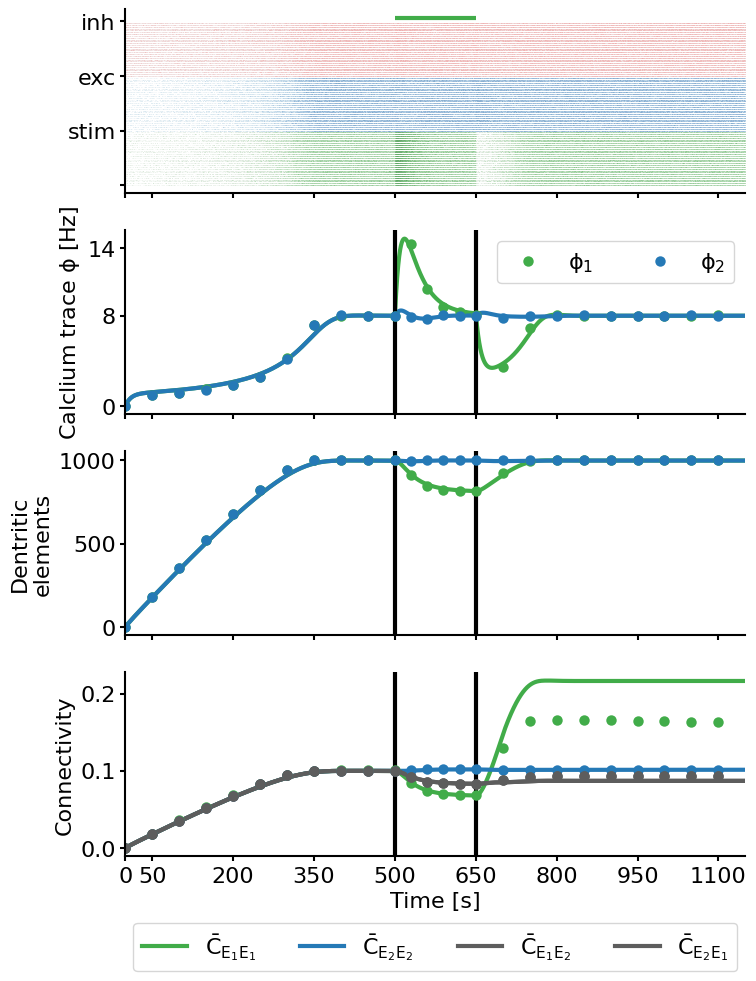

In [8]:
params = {
    'ms': 0.1,
    'subspikes': 30,
    'fontsize': 16,
    'tickwidth': 1.5,
    'linewidth': 3,
    'dotsize': 15,
    'samplestride': 5,
    'e1_color': '#41ac49',#'forestgreen',
    'e2_color': '#2579b6', #'steelblue',
    'e12_color': '#5d5d5d', #'dimgrey',
    'e21_color': '#5d5d5d', #'dimgrey',
    'i_color': 'lightcoral',
    'start_stim': 500,
    'end_stim': 650,
    'samplestride_stim': 3,
    'record_dt': 10
}

folder = 'Experiments/'
name = '_order_2500_eps_0.1_enable_plasticity_True_tau_ca_10. s_nu_ext_mult_1.1_standalone_True'

fig, axs = plt.subplots(4, 1, figsize=(8, 11), sharex=True)
plot_analysis('tracesnaive.h5', fig, axs, params)
plot_experiment(folder, name, params, fig, axs)
plt.savefig("plot.svg")
plt.savefig("plot.png")